### Holt Winter's method

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import datetime

#import os
#os.chdir("C:\\Lecture 9\\")

## Simple Exponential Smoothing
$$
\hat{y}_{T+1 \mid T}=\alpha y_{T}+\alpha(1-\alpha) y_{T-1}+\alpha(1-\alpha)^{2} y_{T-2}+\cdots
$$

where $0 \leq \alpha \leq 1$ is the smoothing parameter. The one-step-ahead forecast for time $T+1$ is a weighted average of all of the observations in the series $y_{1}, \ldots, y_{T}$. The rate at which the weights decrease is controlled by the parameter $\alpha$.

For any $\alpha$ between 0 and $1,$ the weights attached to the observations decrease exponentially as we go back in time, hence the name "exponential smoothing." If $\alpha$ is small (i.e., close to 0 ), more weight is given to observations from the more distant past. If $\alpha$ is large (i.e., close to 1 ), more weight is given to the more recent observations. For the extreme case where $\alpha=1$, $\hat{y}_{T+1 \mid T}=y_{T},$ and the forecasts are equal to the naive forecasts.

$$
\hat{y}_{T\mid T-1}=\alpha y_{T-1}+\alpha(1-\alpha) y_{T-2}+\alpha(1-\alpha)^{2} y_{T-3}+\cdots
$$

multiply both sides by $1-\alpha$

$$
(1-\alpha)\hat{y}_{T\mid T-1}=\alpha(1-\alpha) y_{T-1}+\alpha(1-\alpha)^2 y_{T-2}+\alpha(1-\alpha)^{3} y_{T-3}+\cdots
$$

if we substract last equation from original one, we get that the forecast at time  $T+1$ is equal to a weighted average between the most recent observation $y_T$ and the previous forecast  $\hat{y}_{T|T−1}$:

$$
\hat{y}_{T+1 \mid T}=\alpha y_{T}+(1-\alpha) \hat{y}_{T \mid T-1}
$$

where $0 \leq \alpha \leq 1$ is the smoothing parameter. Similarly, we can write the fitted values as

$$
\hat{y}_{t+1 \mid t}=\alpha y_{t}+(1-\alpha) \hat{y}_{t \mid t-1}
$$

for $t=1, \ldots, T$. (Recall that fitted values are simply one-step forecasts of the training data.)

In [46]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

#### We have column of dates and need to transform it to format recognized by python. In this case we use [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function. We can also generate date column in pandas and for this we use date_range function. You need to specify start date, number of periods and [frequency](https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases).

In [3]:
pd.date_range("2018-01-01", periods=12, freq="H")

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [4]:
Passengers = pd.read_csv(r'AirPassengers.csv') # Air Passengers
Passengers.index = pd.to_datetime(Passengers['index'],format="%Y %b") 
del Passengers["index"]
Passengers.head()
Passengers.index.freq = "MS"  # frequency of index date
m = 12                        # frequency
alpha = 1/(2*m)               # alpha

In [5]:
alpha = 1- alpha

In [6]:
Passengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='index', length=144, freq='MS')

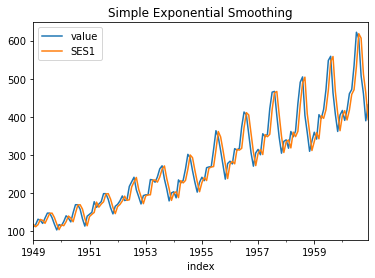

In [7]:
Passengers['SES1'] = SimpleExpSmoothing(Passengers['value'],initialization_method='estimated').fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
Passengers[['value','SES1']].plot(title='Simple Exponential Smoothing');

## Double (Holt's) and Triple (Holt Winters') Exponential Smoothing

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Decomposition of Models

The following two structures are considered for basic decomposition models:

1. Additive:  = Trend + Seasonal + Random
2. Multiplicative:  = Trend * Seasonal * Random

The “Random” term is often called “Irregular”.

![](add_mult.jpg)


# Holt Winters' additive method

The component form for the additive method is:

$$
\begin{aligned}
\hat{y}_{t+h \mid t} &=\ell_{t}+h b_{t}+s_{t+h-m(k+1)} \\
\ell_{t} &=\alpha\left(y_{t}-s_{t-m}\right)+(1-\alpha)\left(\ell_{t-1}+b_{t-1}\right) \\
b_{t} &=\beta^{*}\left(\ell_{t}-\ell_{t-1}\right)+\left(1-\beta^{*}\right) b_{t-1} \\
s_{t} &=\gamma\left(y_{t}-\ell_{t-1}-b_{t-1}\right)+(1-\gamma) s_{t-m}
\end{aligned}
$$

where $k$ is the integer part of $(h-1) / m,$ which ensures that the estimates of the seasonal indices used for forecasting come from the final year of the sample. The level equation shows a weighted average between the seasonally adjusted observation $\left(y_{t}-s_{t-m}\right)$ and the nonseasonal forecast $\left(\ell_{t-1}+b_{t-1}\right)$ for time $t$. The trend equation (the case when only trend is involved is called **Holt's** linear method) shows that  $b_t$ is a weighted average of the estimated trend at time t based on $ℓ_t-l_{t-1}$ and  $b_{t-1}$, the previous estimate of the trend. The seasonal equation shows a weighted average between the current seasonal index, $\left(y_{t}-\ell_{t-1}-b_{t-1}\right),$ and the seasonal index of the same season last year (i.e., $m$ time periods ago ).

**For more check the online book, Sections 7 and 8.10. The link is below**

https://otexts.com/fpp2/holt-winters.html

#### Holt's Exponential Smoothing (trend only)

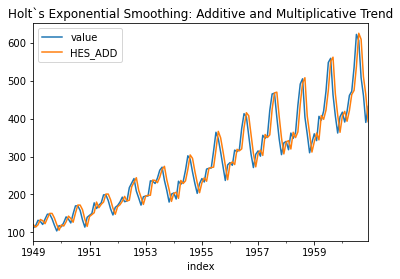

In [9]:
Passengers['HES_ADD'] = ExponentialSmoothing(Passengers['value'],trend='add',seasonal = None,initialization_method='estimated').fit( smoothing_level = 0.999).fittedvalues
Passengers['HES_MUL'] = ExponentialSmoothing(Passengers['value'],trend='mul', seasonal = None,initialization_method='estimated').fit().fittedvalues
Passengers[['value','HES_ADD']].plot(title='Holt`s Exponential Smoothing: Additive and Multiplicative Trend');

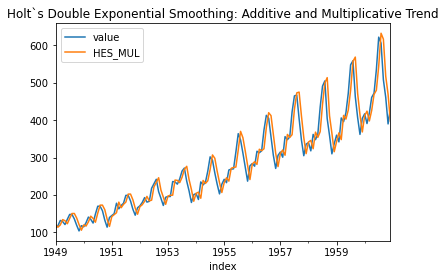

In [10]:
Passengers[['value','HES_MUL']].plot(title='Holt`s Double Exponential Smoothing: Additive and Multiplicative Trend');

#### Holt Winters' Exponential Smoothing (trend and seasonality)

C:\Users\abuta\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\abuta\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


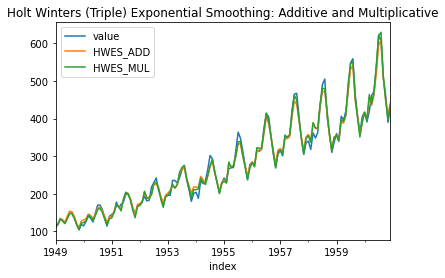

In [11]:
Passengers['HWES_ADD'] = ExponentialSmoothing(Passengers['value'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
Passengers['HWES_MUL'] = ExponentialSmoothing(Passengers['value'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
Passengers[['value','HWES_ADD','HWES_MUL']].plot(title='Holt Winters (Triple) Exponential Smoothing: Additive and Multiplicative');

In [12]:
#help(ExponentialSmoothing)

# Classical decomposition

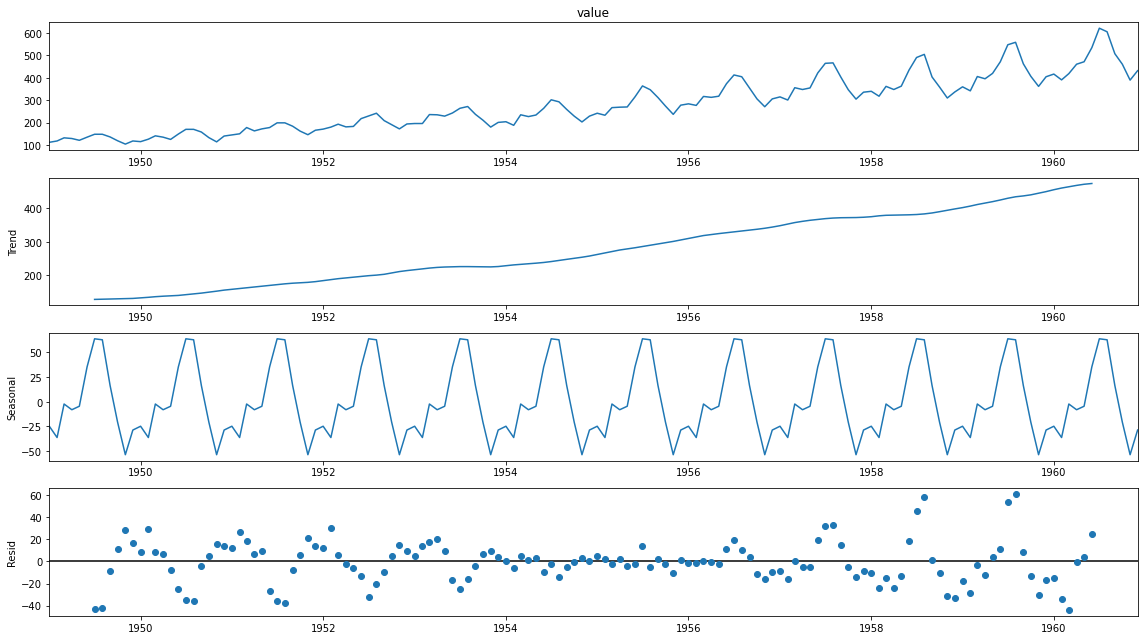

In [70]:
import statsmodels.api as sm

decomp_viz = sm.tsa.seasonal_decompose(Passengers['value'])
fig = decomp_viz.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

In [74]:
decomp_viz.resid
decomp_viz.seasonal
decomp_viz.trend

index
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Freq: MS, Name: trend, Length: 144, dtype: float64

In [80]:
decomp_viz.resid.head(15)

index
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
1949-12-01    16.869949
1950-01-01     8.498737
1950-02-01    29.104798
1950-03-01     8.324495
Freq: MS, Name: resid, dtype: float64

C:\Users\abuta\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


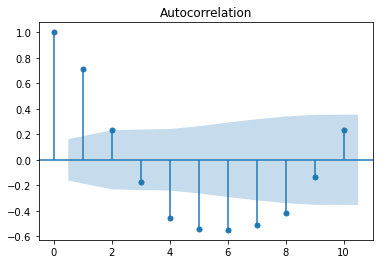

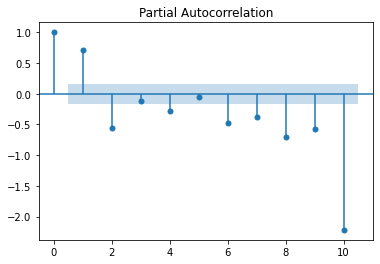

In [81]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(decomp_viz.seasonal, lags=10)      # plot ACF
plot_pacf(decomp_viz.seasonal, lags=10)     # plot PACF
plt.show();

# Example 1 Additive

In [13]:
temp = pd.read_csv(r'globtemp.csv') # Global Temperature 
temp.head()

,index,value
0,1880,-0.20
1,1881,-0.11
2,1882,-0.10
3,1883,-0.20
4,1884,-0.28


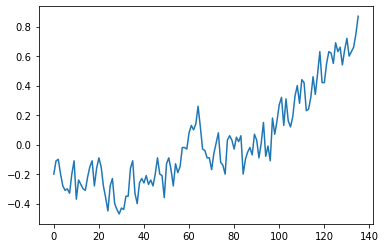

In [14]:
plt.plot(temp.index,temp.value)         # plot series
plt.show();

In [15]:
# Series must be strictly positive when using multiplicative trend or seasonal components.
#temp['HWES3_ADD'] = ExponentialSmoothing(temp['value'],trend='add',seasonal='add',seasonal_periods=4).fit().fittedvalues
#temp['HWES3_MUL'] = ExponentialSmoothing(temp['value'],trend='mul',seasonal='mul',seasonal_periods=4).fit().fittedvalues
#temp[['value','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

#### In practice one can just add a positive number to the  series to continue with multiplicative model. See the example below 


In [16]:
temp_new = temp + 10 

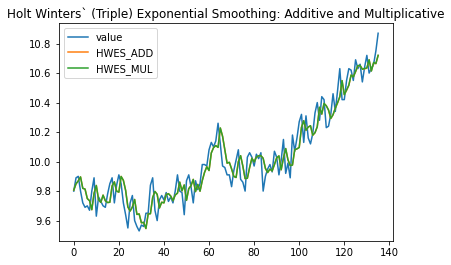

In [17]:
temp_new['HWES_ADD'] = ExponentialSmoothing(temp_new['value'],trend='add',seasonal='add',seasonal_periods=4, initialization_method='estimated').fit().fittedvalues
temp_new['HWES_MUL'] = ExponentialSmoothing(temp_new['value'],trend='mul',seasonal='mul',seasonal_periods=4, initialization_method='estimated').fit().fittedvalues
temp_new[['value','HWES_ADD','HWES_MUL']].plot(title='Holt Winters` (Triple) Exponential Smoothing: Additive and Multiplicative');

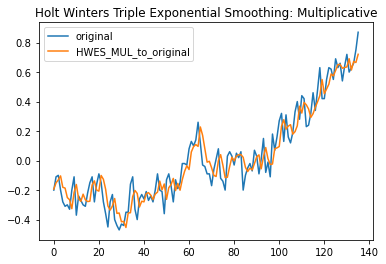

In [18]:
temp_new['original'] = temp_new.value - 10                      # reversing values of series back to original values
temp_new['HWES_MUL_to_original'] = temp_new.HWES_MUL - 10      # reversing estimated values of series back to original values
temp_new[['original','HWES_MUL_to_original']].plot(title='Holt Winters Triple Exponential Smoothing: Multiplicative');

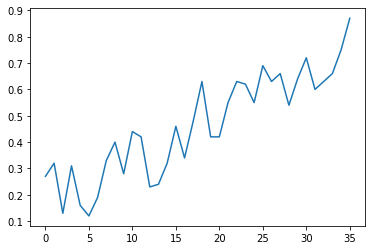

In [19]:
temp_current = temp[100:] # we take second part of series where they are positive
temp_current.reset_index(inplace = True)
plt.plot(temp_current.index,temp_current.value)         # plot series
plt.show();

C:\Users\abuta\AppData\Local\Temp/ipykernel_15320/1063114231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_current['HWES_ADD'] = ExponentialSmoothing(temp_current['value'],trend='add',seasonal='add',seasonal_periods=4, initialization_method='estimated').fit().fittedvalues
C:\Users\abuta\AppData\Local\Temp/ipykernel_15320/1063114231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_current['HWES_MUL'] = ExponentialSmoothing(temp_current['value'],trend='mul',seasonal='mul',seasonal_periods=4

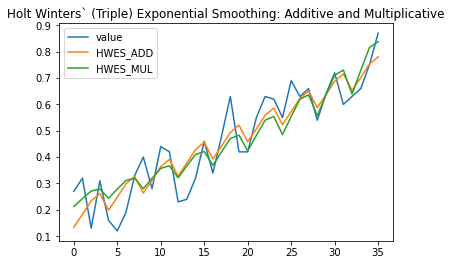

In [20]:
temp_current['HWES_ADD'] = ExponentialSmoothing(temp_current['value'],trend='add',seasonal='add',seasonal_periods=4, initialization_method='estimated').fit().fittedvalues
temp_current['HWES_MUL'] = ExponentialSmoothing(temp_current['value'],trend='mul',seasonal='mul',seasonal_periods=4, initialization_method='estimated').fit().fittedvalues
temp_current[['value','HWES_ADD','HWES_MUL']].plot(title='Holt Winters` (Triple) Exponential Smoothing: Additive and Multiplicative');

In [21]:
mean_squared_error(temp_current.value, temp_current.HWES_ADD)

0.006426130499729658

In [22]:
mean_squared_error(temp_current.value, temp_current.HWES_MUL)

0.006624505545061156

#### Since both trend and seasonality are additive, the first model captures series better (measured by mean squared error)

In [23]:
# Example 2 Multiplicative

In [24]:
jonson = pd.read_csv(r'jj.csv') # Jonson & Jonson
jonson.head()

,index,value
0,1960 Q1,0.71
1,1960 Q2,0.63
2,1960 Q3,0.85
3,1960 Q4,0.44
4,1961 Q1,0.61


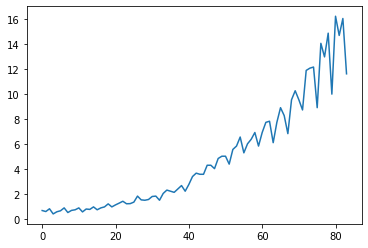

In [25]:
plt.plot(jonson.index,jonson.value)         # plot series
plt.show();

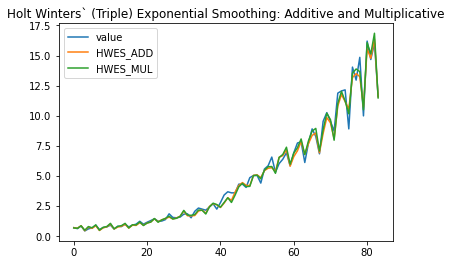

In [26]:
jonson['HWES_ADD'] = ExponentialSmoothing(jonson['value'],trend='add',seasonal='add',seasonal_periods=4, initialization_method='estimated').fit().fittedvalues
jonson['HWES_MUL'] = ExponentialSmoothing(jonson['value'],trend='mul',seasonal='mul',seasonal_periods=4, initialization_method='estimated').fit().fittedvalues
jonson[['value','HWES_ADD','HWES_MUL']].plot(title='Holt Winters` (Triple) Exponential Smoothing: Additive and Multiplicative');

In [27]:
mean_squared_error(jonson.value, jonson.HWES_ADD)

0.19736216729930328

In [28]:
mean_squared_error(jonson.value, jonson.HWES_MUL)

0.15832224234795764

#### Since both trend and seasonality are multiplicative, the later model captures series better (measured by mean squared error)

## Example 3 Holt Winter's vs ARIMA

In [33]:
gold_price = pd.read_csv(r'gold_price.csv') 
gold_price.index = pd.to_datetime(gold_price['index'],format="%m/%d/%Y") 
del gold_price["index"]
#Passengers.head()
gold_price.head()

,value
index,
1985-01-01,306.25
1985-01-02,299.50
1985-01-03,303.45
1985-01-04,296.75
1985-01-05,304.40


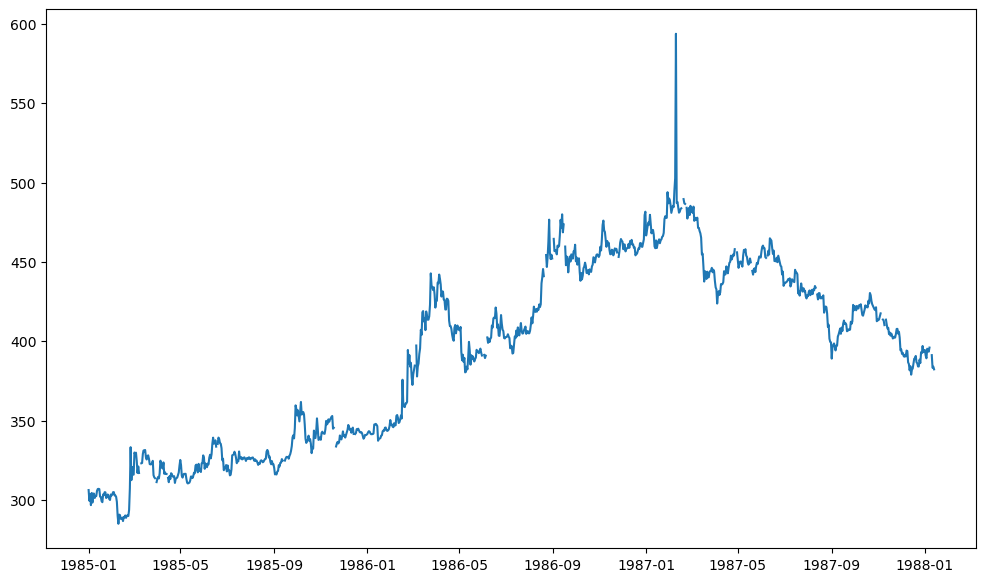

In [5]:
plt.figure(figsize=(12,7))
plt.plot(gold_price.index,gold_price.value)         # plot series
plt.show();

In [34]:
gold_price.value = gold_price.value.fillna(method='ffill')

C:\Users\hasmi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


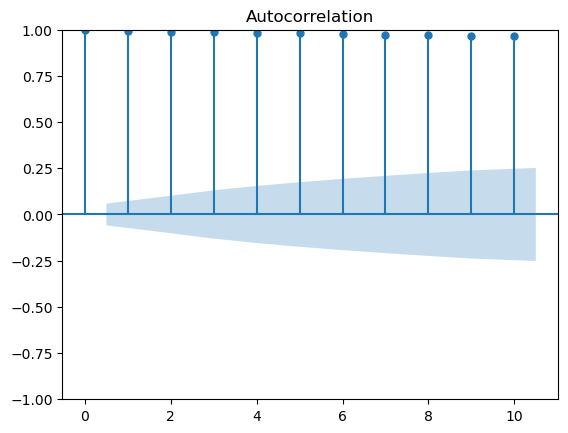

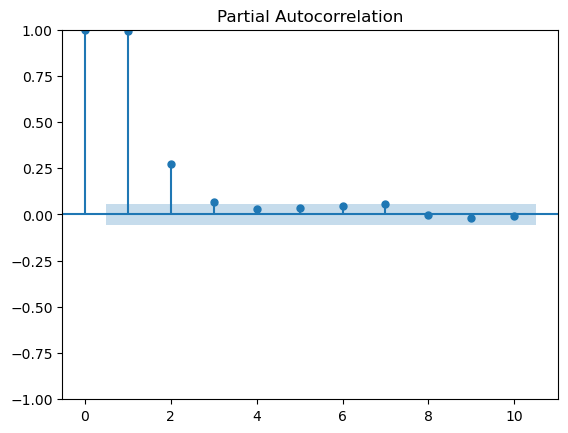

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(gold_price.value, lags=10)      # plot ACF
plot_pacf(gold_price, lags=10)     # plot PACF
plt.show();

In [35]:
# first order difference
gold_price['value_d1'] = gold_price.value.diff(1)

NameError: name 'plot_acf' is not defined

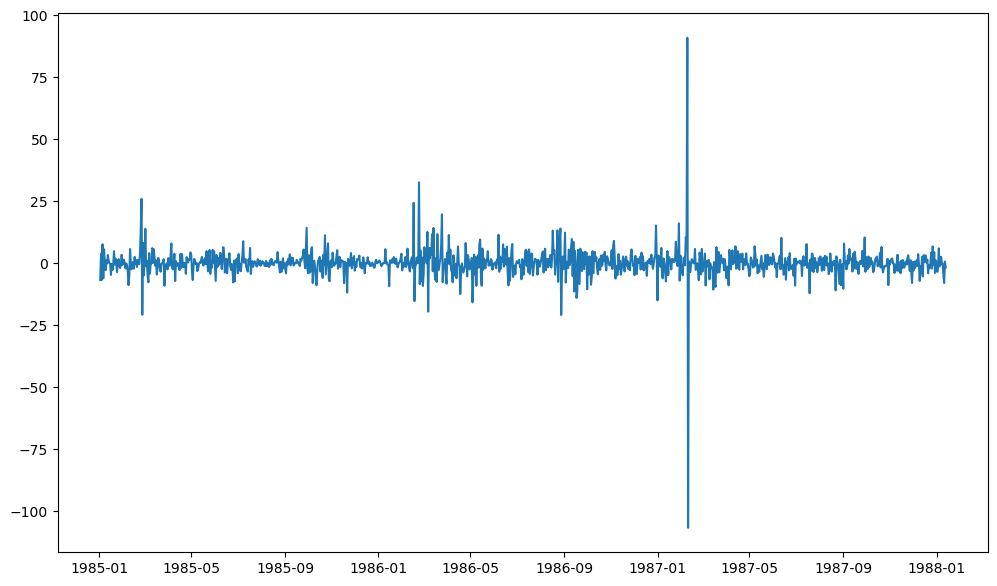

In [36]:
plt.figure(figsize=(12,7))
plt.plot(gold_price.index,gold_price.value_d1)  
plot_acf(gold_price.value_d1[1:], lags=10)      # plot ACF
plot_pacf(gold_price.value_d1[1:], lags=10)     # plot PACF
plt.show();

In [21]:
# It's MA(1) process
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(gold_price['value_d1'], order=(0,0,1), freq="D")
result = mod.fit()
print(result.summary())

KeyError: 'value_d1'

In [54]:
# Plot the original series and the forecasted series
# result.forecast()

1988-01-14    383.11748
Freq: D, dtype: float64

In [11]:
#start_index = '1988-01-14'
#end_index = '1988-01-25'
gold_price['predict'] = result.predict()

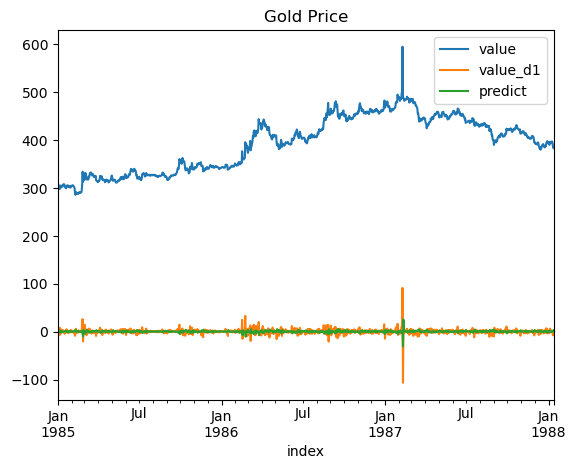

In [12]:
gold_price[['value','value_d1','predict']].plot(title='Gold Price');

In [13]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(gold_price['value'], order=(0,1,1), freq="D")
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 1108
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3503.294
Date:                Wed, 05 Apr 2023   AIC                           7010.589
Time:                        10:14:19   BIC                           7020.608
Sample:                    01-01-1985   HQIC                          7014.378
                         - 01-13-1988                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3281      0.004    -73.247      0.000      -0.337      -0.319
sigma2        32.8308      0.213    154.274      0.000      32.414      33.248
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\hasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
gold_price['predict_original'] = result.predict()

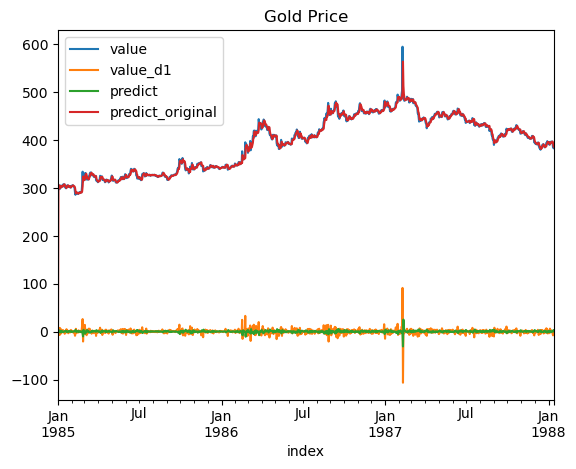

In [15]:
gold_price[['value','value_d1','predict','predict_original']].plot(title='Gold Price');

In [1]:
!pip install pmdarima

     -------------------------------------- 569.7/569.7 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 988.1/988.1 kB 6.3 MB/s eta 0:00:00


In [8]:
import pmdarima as pm

gold_model = pm.auto_arima(gold_price.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=7,              # frequency of series
                      #d=True,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0,
                      max_P=3,
                      max_Q = 3,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(gold_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=7015.277, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=7122.015, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=7022.750, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=7013.368, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=7120.158, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=7012.209, Time=0.30 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=7013.354, Time=0.49 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=7015.296, Time=1.44 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=7014.102, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=7014.136, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=7021.885, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=7014.262, Time=1.31 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=7010.589, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=7011.709, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[7]          

In [19]:
gold_price['Holt_W'] = SimpleExpSmoothing(gold_price['value']).fit().fittedvalues

C:\Users\hasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


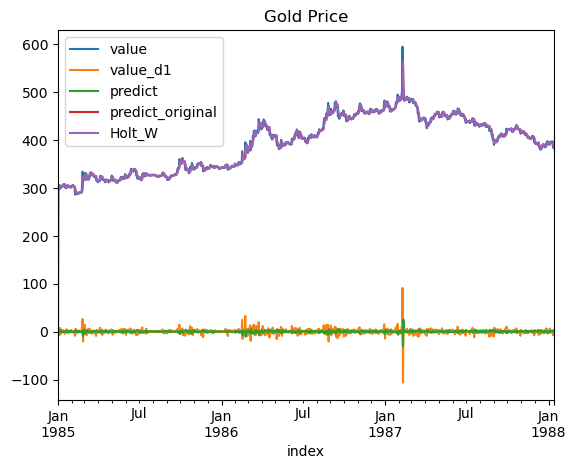

In [20]:
gold_price[['value','value_d1','predict','predict_original','Holt_W']].plot(title='Gold Price');

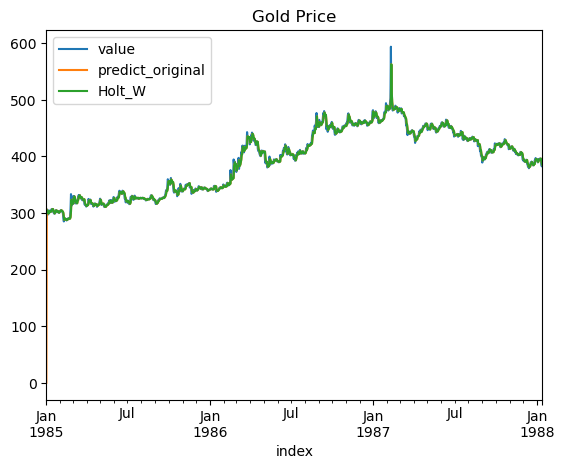

In [21]:
gold_price[['value','predict_original','Holt_W']].plot(title='Gold Price');

In [22]:
mean_squared_error(gold_price.value, gold_price.predict_original)

117.45245795982287

In [23]:
mean_squared_error(gold_price.value, gold_price.Holt_W)

32.801251813478935

## Train model only on first part of the data

In [63]:
gold_price.shape

(1108, 4)

In [64]:
gold_price_train = gold_price.head(1000)

In [65]:
gold_price_train.shape

(1000, 4)

In [81]:
mod = ARIMA(gold_price_train['value'], order=(0,1,1), freq="D")
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 1000
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3197.916
Date:                Wed, 05 Apr 2023   AIC                           6399.832
Time:                        13:24:35   BIC                           6409.645
Sample:                    01-01-1985   HQIC                          6403.562
                         - 09-27-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3380      0.005    -69.981      0.000      -0.347      -0.329
sigma2        35.3124      0.246    143.588      0.000      34.830      35.794
Ljung-Box (L1) (Q):                   0.01   Jarque-

C:\Users\hasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [82]:
gold_price['predict'] = result.forecast(108)

In [83]:
gold_price['simple_smoothing'] = SimpleExpSmoothing(gold_price_train['value']).fit().forecast(108)

C:\Users\hasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [84]:
gold_price['Holt_W'] = ExponentialSmoothing(gold_price_train['value'],trend='add',seasonal='add',seasonal_periods=7, initialization_method='estimated').fit().forecast(108)

C:\Users\hasmi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [85]:
gold_price

,value,value_d1,predict,Holt_W,simple_smoothing
index,,,,,
1985-01-01,306.25,NaN,NaN,NaN,NaN
1985-01-02,299.50,-6.75,NaN,NaN,NaN
1985-01-03,303.45,3.95,NaN,NaN,NaN
1985-01-04,296.75,-6.70,NaN,NaN,NaN
1985-01-05,304.40,7.65,NaN,NaN,NaN
...,...,...,...,...,...
1988-01-09,396.00,0.00,410.864858,422.044040,410.864107
1988-01-10,391.25,-4.75,410.864858,422.285984,410.864107
1988-01-11,383.30,-7.95,410.864858,423.081785,410.864107


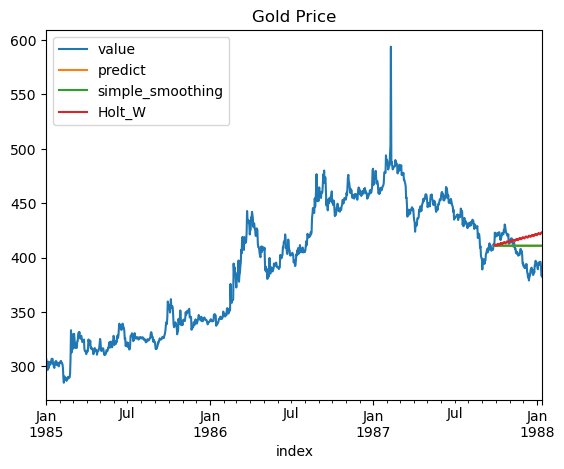

In [86]:
gold_price[['value','predict','simple_smoothing','Holt_W']].plot(title='Gold Price');

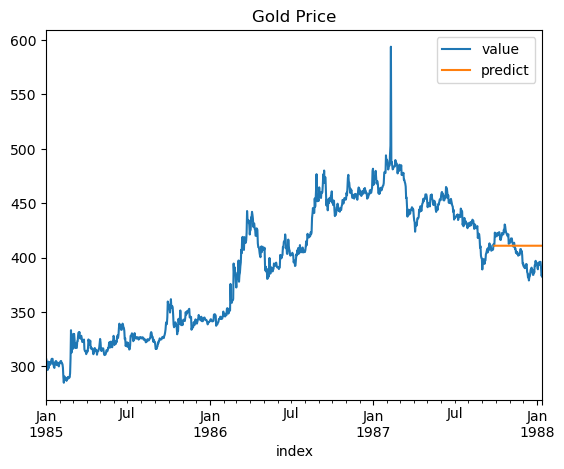

In [87]:
gold_price[['value','predict']].plot(title='Gold Price');

# Which model would you choose MA(1) vs Holt Winter's?

# Justify your answer to the previous question.

# What problems would you have in prediction?

# What problems would standard cross validation raise? 

# What is the solution? 


## ETS Models example from statmodels
https://www.statsmodels.org/dev/examples/notebooks/generated/ets.html

https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html

https://www.statsmodels.org/devel/generated/statsmodels.tsa.holtwinters.Holt.html
https://www.statsmodels.org/devel/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html    